# Oscylator harmoniczny, tłumiony, bez działania siły wymuszającej

### Zadanie 1
Ułóż różniczkowe równanie ruchu tłumionego oscylatora harmonicznego (punkt materialy o masie $m$ przymocowany sprężyną o współczynniku sprężystości $k$ do punktu $x=0$, poruszający sie w ośrodku stawiającym opór, którego miarą jest siła oporu proporcjonalna do prędkości ciała: $F = -b*v$).

### Przykładowe rozwiązanie

In [1]:
t = var('t')
k = var('k')
m = var('m')
b = var('b')
x = function('x')(t)

eq = m*diff(x,t,2) == - k*x - b*diff(x, t)
show(eq)

m*diff(x(t), t, t) == -k*x(t) - b*diff(x(t), t)

### Zadanie 2
Rozwiąż równanie otrzymane w zadaniu 1 dla warunków początkowych $x(0)=x0$ oraz $v(0)=v0$. Dla jakich wartości parametru $b$ rozwiązanie ma charakter oscylacyjny?

In [2]:
x0 = var('x0')
v0 = var('v0')

assume(k>0)
assume(m>0)
assume(b>0)
assume(4*k*m-b^2>0)

x_t = desolve_laplace(eq, x, ivar=t, ics=[0, x0, v0])
show(x_t)

(m*x0*cos(1/2*sqrt(-b^2 + 4*k*m)*t/m) - (b*m*x0 - 2*(m*v0 + b*x0)*m)*sin(1/2*sqrt(-b^2 + 4*k*m)*t/m)/sqrt(-b^2 + 4*k*m))*e^(-1/2*b*t/m)/m

**WNIOSKI:** Funkcja ma rozwiązania rzeczywiste dla $-b^2 + 4km > 0$. Uwzględniając, że $b>0$ otrzymujemy zakres rozwiązań $b \in \langle 0, 2) $. 

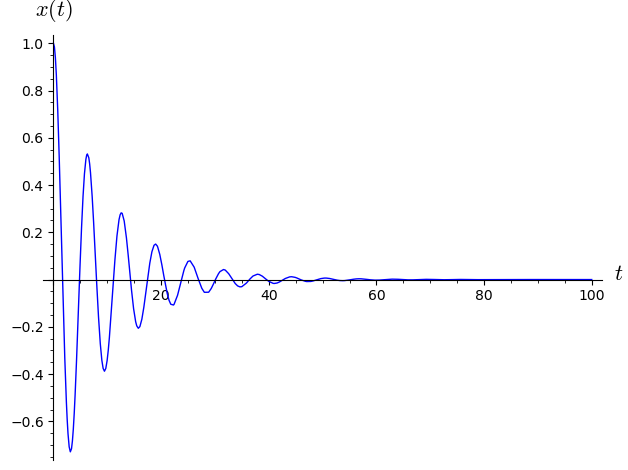

In [3]:
p1 = x_t.subs(x0==1, v0==0, m==1, k==1, b==0.2)
plot(p1, (t, 0, 100), axes_labels=[r'$t$', r'$x(t)$'])

Utwórzmy animację zmiany wykresu $x(t)$ w zależności od wartości współczynnika $b$.

Animation with 190 frames
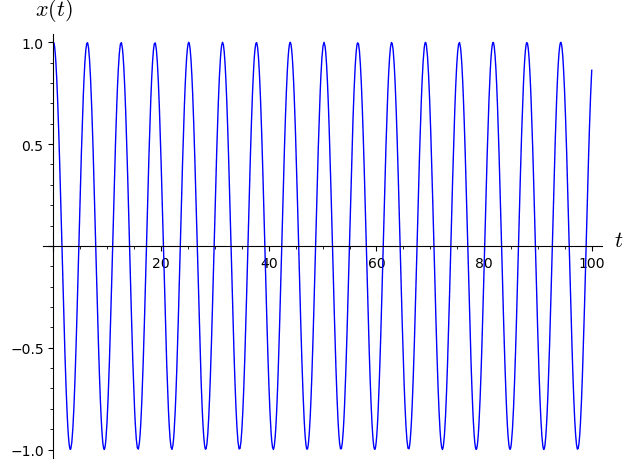

In [4]:
# Aby uruchomić animację w notatniku, należy doinstalować oprogramowanie ImageMagick:
# https://doc.sagemath.org/html/en/reference/plotting/sage/plot/animate.html
# https://doc.sagemath.org/html/en/reference/spkg/imagemagick.html

# Ważne, aby ścieżki pod którymi znajdują się zainstalowane programy było dodane do zmiennej środowiskowej PATH
# https://imagemagick.org/script/download.php#macosx
# import os
# os.environ["PATH"]+=":/opt/homebrew/bin/convert"

# Przed uruchomieniem warto upewnić się, że sagemath i jupyter mają dostęp do programu convert:
# from sage.misc.sage_ostools import have_program
# have_program('convert')
# Powyższa komenda powinna zwrócić wartość True

animtab = [plot(x_t.subs(x0==1, v0==0, m==1, k==1, b==c), (t, 0, 100), axes_labels=[r'$t$', r'$x(t)$']) for c in sxrange(0,1.9,.01)]
demo = animate(animtab)       
demo.show() 

### Zadanie 3
Znajdź w uzyskanym rozwiązaniu wyrażenie okreslające częstość drgań oscylatora $\omega$ i porównaj je graficznie z wartością $\omega_0$ odpowiadającą częstości kołowej dla oscylatora harmonicznego nietłumionego.

In [ ]:
show(x_t)

(m*x0*cos(1/2*sqrt(-b^2 + 4*k*m)*t/m) - (b*m*x0 - 2*(m*v0 + b*x0)*m)*sin(1/2*sqrt(-b^2 + 4*k*m)*t/m)/sqrt(-b^2 + 4*k*m))*e^(-1/2*b*t/m)/m

In [6]:
omega = var('omega')
omega_0 = var('omega_0')

# Argumentem zarówno funkcji sinus i cosinus jest:

omega = sqrt(-b^2 + 4*k*m)/(2*m)
show(omega)

omega_0 = sqrt(k/m)


1/2*sqrt(-b^2 + 4*k*m)/m

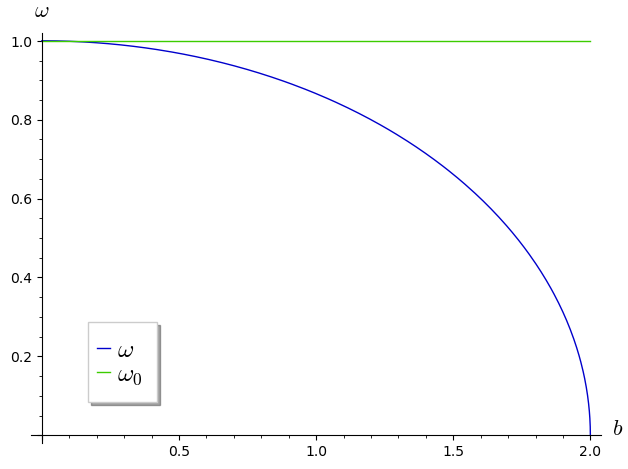

In [7]:
om = omega.subs(k==1, m==1)
om0 = omega_0.subs(k==1, m==1)

p2 = plot((om, om0), (b, 0, 2), axes_labels=[r'$b$', r'$\omega$'], legend_label=[r'$\omega$', r'$\omega_0$'])
p2.set_legend_options(loc = (0.1, 0.1))
p2.set_legend_options(font_size=18)
show(p2)

### Zadanie 4

Wyznacz okres $T$ jego drgań. Porównaj na wykresie zależność okresu teoretycznego i rzeczywistego (wyliczonego numerycznie) w zależności od współczynnika tłumienia $b$.

In [8]:
T0 = var('T0')
T0 = 2*pi/omega

show(T0)
show(T0.subs(m==1, k==1))

4*pi*m/sqrt(-b^2 + 4*k*m)

4*pi/sqrt(-b^2 + 4)

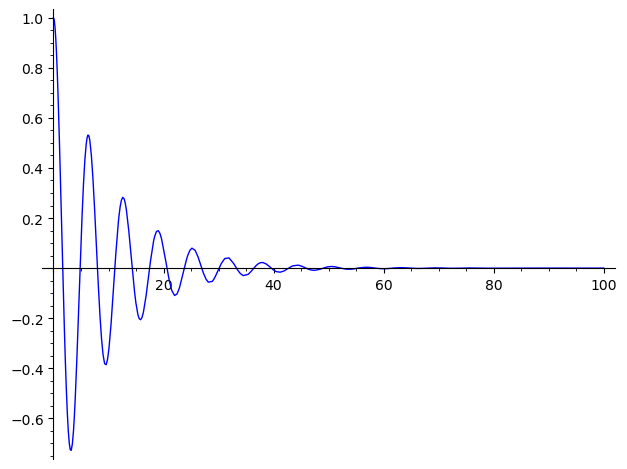

In [9]:
plot(p1, (t, 0, 100))

In [10]:
val_b = 0.1

x_r = x_t.subs(x0==1, v0==0, m==1, k==1, b==val_b)

step = 0.5*T0.subs(m==1, k==1, b==val_b)

x_r1 = find_root(x_r, 0, step)
print(x_r1)

x_r2 = find_root(x_r, step, 2*step)
print(x_r2)

x_r3 = find_root(x_r, 2*step, 3*step)
print(x_r3)

x_r4 = find_root(x_r, 3*step, 4*step)
print(x_r4)

1.6228470118020428
4.768374034690046
7.913901057578049
11.05942808046605


In [11]:
T_real = x_r3 - x_r1
print(f"Real T value: {T_real}")
print(f"Theoret. T value: {N(T0.subs(m==1, k==1, b==val_b))}")
dT = T_real - N(T0.subs(m==1, k==1, b==val_b))
print(f"T_real - T0 = {dT}")

Real T value: 6.291054045776006
Theoret. T value: 6.29105404577600
T_real - T0 = 3.55271367880050e-15


In [12]:
TR_tab = []
T0_tab = []


for i in range(200):
    val_b = i*0.01
    x_r = x_t.subs(x0==1, v0==0, m==1, k==1, b==val_b)
    step = 0.5*T0.subs(m==1, k==1, b==val_b)
    x_r1 = find_root(x_r, 0, step)
    x_r3 = find_root(x_r, 2*step, 3*step)
    T_real = x_r3 - x_r1
    T_0 = N(T0.subs(m==1, k==1, b==val_b))
    #b_tab.append(val_b)
    TR_tab.append((val_b, T_real))
    T0_tab.append((val_b, T_0))


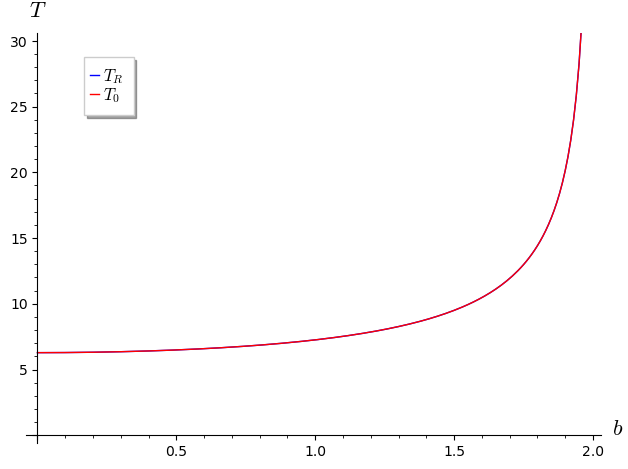

In [13]:
lp1 = list_plot(T0_tab, ymin = 0, ymax = 30, plotjoined=True, color='red', legend_label='$T_0$')
lp2 = list_plot(TR_tab, ymin = 0, ymax = 30, plotjoined=True, color='blue', legend_label='$T_R$')
lp = lp2 + lp1
lp.axes_labels([r'$b$', r'$T$'])

lp.set_legend_options(loc = (0.1, 0.8))
lp.set_legend_options(font_size=12)
lp.show()

### Zadanie 5
Wyznacz relację określającą tłumienie krytyczne, czyli sytuację, w które $\omega_0 = 0$ oraz $T_0 = \infty$.

In [14]:
show(omega)

1/2*sqrt(-b^2 + 4*k*m)/m

In [15]:
show(T0)

4*pi*m/sqrt(-b^2 + 4*k*m)

In [16]:
forget()
condition = (-b^2 + 4*k*m == 0)
show(condition)
solution = solve(condition, b)
show(solution)
show(solution[1])

-b^2 + 4*k*m == 0

[b == -2*sqrt(k*m), b == 2*sqrt(k*m)]

b == 2*sqrt(k*m)

**WNIOSKI:** Tłumienie krytyczne występuje dla $b = 2 \sqrt{km}$. Przyjmując $k=1$, $m=1$ otrzymujemy tłumienie krytyczne dla wartości $b=2$.

Dla ustalonego $m=1$ i $k=1$ szukamy ekstremum wychylenia x1

In [17]:
x1 = x_t.subs(x0==1, v0==0, m==1, k==1)
x1_prim = diff(x1, t)
show(x1_prim)

-1/2*(b*sin(1/2*sqrt(-b^2 + 4)*t)/sqrt(-b^2 + 4) + cos(1/2*sqrt(-b^2 + 4)*t))*b*e^(-1/2*b*t) + 1/2*(b*cos(1/2*sqrt(-b^2 + 4)*t) - sqrt(-b^2 + 4)*sin(1/2*sqrt(-b^2 + 4)*t))*e^(-1/2*b*t)

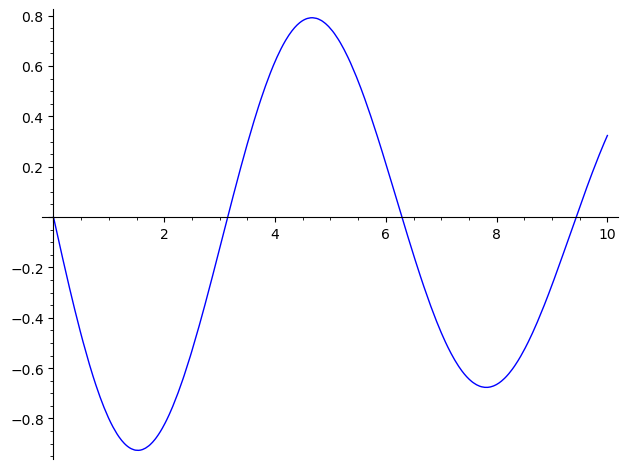

In [18]:
val_b = 0.1

plot(x1_prim.subs(b==val_b), (t, 0, 10))

Z wykresu odczytujemy, że znaleziona pochodna pochodna ma miejsce zerowe dla $2<t<4$. Wyznaczamy miejsce zerowe.

In [19]:
first_root = find_root(x1_prim.subs(b==val_b), 2, 4)
print(first_root)

3.1455270228879972


Sporządzamy wykres zależności czasu pierwszego minimum od współczynnika tłumienia.

In [20]:
fr_tab = []

for i in range(200):
    val_b = i*0.01
    step = N(0.5*T0.subs(m==1, k==1, b==val_b))
    first_root = find_root(x1_prim.subs(b==val_b), 0.75*step, 1.5*step)
    fr_tab.append((val_b, first_root))

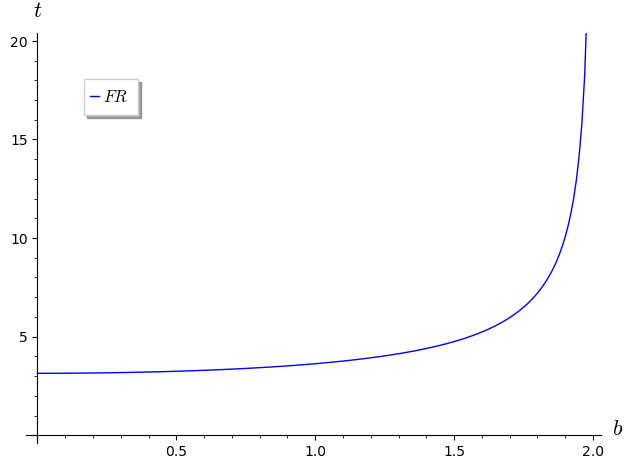

In [21]:
lp3 = list_plot(fr_tab, ymin = 0, ymax = 20, plotjoined=True, color='blue', legend_label='$FR$')
lp3.axes_labels([r'$b$', r'$t$'])
lp3.set_legend_options(loc = (0.1, 0.8))
lp3.set_legend_options(font_size=12)
lp3.show()

Sprawdzamy, czy dla wartości $b$ bliskich $2$ pochodna położenia osiąga zero.

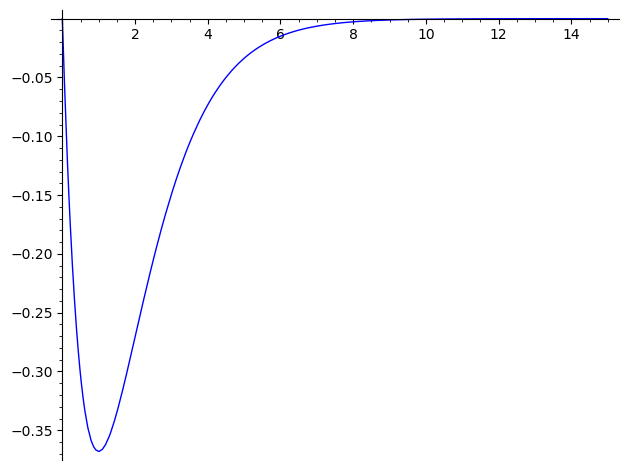

In [22]:
plot(x1_prim.subs(b==1.9999), (t, 0, 15))

In [23]:
x1_prim.subs(b==1.9999, t==15)

-4.57477737541839e-6

**WNIOSEK:** Dla wartości $b$ bliskich $2$ pochodna funkcji nie osiąga zera. 

(b*sin(1/2*sqrt(-b^2 + 4)*t)/sqrt(-b^2 + 4) + cos(1/2*sqrt(-b^2 + 4)*t))*e^(-1/2*b*t)

-1/2*(b*sin(1/2*sqrt(-b^2 + 4)*t)/sqrt(-b^2 + 4) + cos(1/2*sqrt(-b^2 + 4)*t))*b*e^(-1/2*b*t) + 1/2*(b*cos(1/2*sqrt(-b^2 + 4)*t) - sqrt(-b^2 + 4)*sin(1/2*sqrt(-b^2 + 4)*t))*e^(-1/2*b*t)

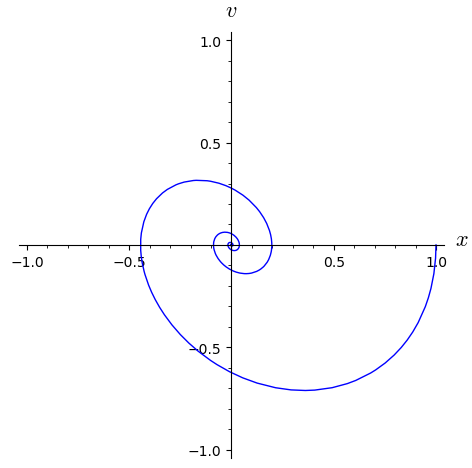

In [24]:
show(x1)
show(x1_prim)

val_b = 0.5
x = x1.subs(b==val_b)
v = x1_prim.subs(b==val_b)
ps = parametric_plot((x, v), (t, 0, 100), plot_points=1000)
ps.set_axes_range(xmin=-1, xmax=1, ymin = -1, ymax = 1)
ps.axes_labels([r'$x$', r'$v$'])
show(ps)

Animation with 95 frames
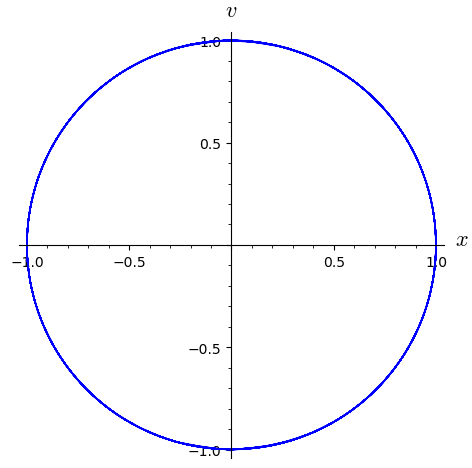

In [41]:
animtab = [parametric_plot((x1.subs(b==c), x1_prim.subs(b==c)), (t, 0, 100), plot_points=1000, axes_labels=[r'$x$', r'$v$']) for c in sxrange(0,1.9,0.02)]
demo = animate(animtab, xmin = -1, xmax = 1, ymin = -1, ymax = 1)  
demo.show() 

In [42]:
# Zapis animacji w formacie gif wymaga instalacji w systemie programu 

demo.save("animacja_pf.gif")